### 0-导语
很多机器学习的问题都会涉及到有着几千甚至数百万维的特征的训练实例。这种问题通常被称为维数灾难（curse of dimentionality）。
#### 像素降维实例：
对于 MNIST 图片集：图片四周边缘部分的像素几乎总是白的，因此你完全可以将这些像素从你的训练集中扔掉而不会丢失太多信息。同时，两个相邻的像素往往是高度相关的：如果你想要将他们合并成一个像素（比如取这两个像素点的平均值）你并不会丢失很多信息。
#### 先尝试使用原始的数据来训练，如果训练速度太慢的话再考虑使用降维。
降维肯定会丢失一些信息（这就好比将一个图片压缩成 JPEG 的格式会降低图像的质量），因此即使这种方法可以加快训练的速度，同时也会让你的系统表现的稍微差一点；降维会让你的工作流水线更复杂因而更难维护。在某些情况下，降低训练集数据的维度可能会筛选掉一些噪音和不必要的细节，这可能会让你的结果比降维之前更好（这种情况通常不会发生；它只会加快你训练的速度）。
#### 降维除了可以加快训练速度外，在数据可视化方面（或者 DataViz）也十分有用。
降低特征维度到 2（或者 3）维从而可以在图中画出一个高维度的训练集，让我们可以通过视觉直观的发现一些非常重要的信息，比如聚类。

### 1-维数灾难
#### 物体在高维空间表现的十分不同。——训练集的维度越高，过拟合的风险就越大。
1-在高维超正方体中，大多数点都分布在边界处。<br>
2-高维数据集有很大风险分布的非常稀疏：大多数训练实例可能彼此远离。一个新实例可能远离任何训练实例，这使得预测的可靠性远低于我们处理较低维度数据的预测，因为它们将基于更大的推测（extrapolations）。<br>
3-理论上来说，维数爆炸的一个解决方案是增加训练集的大小从而达到拥有足够密度的训练集。不幸的是，在实践中，达到给定密度所需的训练实例的数量随着维度的数量呈指数增长。

### 2-降维的主要方法
#### 投影（Projection）
背景：在大多数现实生活的问题中，训练实例并不是在所有维度上均匀分布的。许多特征几乎是常数，而其他特征则高度相关。结果，所有训练实例实际上位于（或接近）高维空间的低维子空间内。<br>
但是，投影并不总是降维的最佳方法。在很多情况下，子空间可能会扭曲和转动。
#### 流形学习
背景：瑞士卷一个是二维流形的例子。简而言之，二维流形是一种二维形状，它可以在更高维空间中弯曲或扭曲。更一般地，一个d维流形是类似于d维形状的n维空间（其中d < n）的一部分。<br>
流形约束条件：流形学习依赖于流形猜想（manifold assumption），也被称为流形假设（manifold hypothesis），它认为大多数现实世界的高维数据集大都靠近一个更低维的流形。这种假设经常在实践中被证实。<br>
隐含的假设：你现在的手上的工作（例如分类或回归）如果在流形的较低维空间中表示，那么它们会变得更简单。但是，这个假设并不总是成立。

### 3-主成分分析（PCA，Principal Component Analysis）
——近似于线性投影<br>
首先它找到接近数据集分布的超平面，然后将所有的数据都投影到这个超平面上。
#### 保留（最大）方差
在将训练集投影到较低维超平面之前，您首先需要选择正确的超平面。<br>
选择保持最大方差的轴看起来是合理的，因为它很可能比其他投影损失更少的信息。<br>
证明这种选择的另一种方法是，选择这个轴使得将原始数据集投影到该轴上的均方距离最小。这是就 PCA 背后的思想，相当简单。<br>
#### 主成分（Principle Componets）
PCA 寻找训练集中可获得最大方差的轴。在 2D 例子中，它还发现了一个与第一个轴正交的第二个轴，选择它可以获得最大的残差。如果在一个更高维的数据集中，PCA 也可以找到与前两个轴正交的第三个轴，以及与数据集中维数相同的第四个轴，第五个轴等。<br> 
定义第i个轴的单位向量为第i个主成分（PC），按照最大方差原则。奇异值分解（SVD）的标准矩阵分解技术，可以将训练集矩阵X分解为三个矩阵U·Σ·V^T的点积，其中V^T包含我们想要的所有主成分。
<img src='https://hands1ml.apachecn.org/docs/img/e-8-1.gif'><br>
警告：PCA 假定数据集以原点为中心。正如我们将看到的，Scikit-Learn 的PCA类负责为您的数据集中心化处理。但是，如果您自己实现 PCA（如前面的示例所示），或者如果您使用其他库，不要忘记首先要先对数据做中心化处理。

In [3]:
import numpy as np
from sklearn import datasets
#from sklearn.datasets import make_moons

iris = datasets.load_iris()
X = iris["data"] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

# 中心化
X_centered=X-X.mean(axis=0)
# 使用了 Numpy 提供的svd()函数获得训练集的所有主成分
U,s,V=np.linalg.svd(X_centered)
print(X.shape,V.shape)
# 然后提取前两个 PC
c1=V.T[:,0]
c2=V.T[:,1]
c1,c2

(150, 4) (4, 4)


(array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]),
 array([-0.65658877, -0.73016143,  0.17337266,  0.07548102]))

#### 投影到d维空间
一旦确定了所有的主成分，你就可以通过将数据集投影到由前d个主成分构成的超平面上，从而将数据集的维数降至d维。选择这个超平面可以确保投影将保留尽可能多的方差。
为了将训练集投影到超平面上，可以简单地通过计算训练集矩阵X和Wd的点积，Wd定义为包含前d个主成分的矩阵（即由V^T的前d列组成的矩阵）<br>
<img src='https://hands1ml.apachecn.org/docs/img/tex-4d58b6f45f2e33f3ceb537b2b174c09b.gif'><br>

In [7]:
W2=V.T[:,:2]
X2D=X_centered.dot(W2)
X2D[0:1,]

array([[-2.68412563, -0.31939725]])

#### 使用 Scikit-Learn
Scikit-Learn 的 PCA 类使用 SVD 分解来实现，就像我们之前做的那样。

In [9]:
# 以下代码应用 PCA 将数据集的维度降至两维（请注意，它会自动处理数据的中心化）
from sklearn.decomposition import PCA

# 将数据集的维度降至两维
pca=PCA(n_components=2)
X2D=pca.fit_transform(X)
X2D[0:1,]

array([[-2.68412563,  0.31939725]])

In [9]:
# 将 PCA 转化器应用于数据集后，可以使用components_访问每一个主成分;注意,它返回以 PC 作为水平向量的矩阵
# 因此，如果我们想要获得第一个主成分则可以写成pca.components_.T[:,0]
pca.components_.T[:,0]

array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])

#### 方差解释率（Explained Variance Ratio）
另一个非常有用的信息是每个主成分的方差解释率，可通过explained_variance_ratio_变量获得。它表示位于每个主成分轴上的数据集方差的比例。

In [10]:
# 这表明，92.4% 的数据集方差位于第一轴，5.3% 的方差位于第二轴。
# 剩余轴的这一比例不到 2.3%，因此可以认为它可能没有包含什么信息。
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


#### 选择正确的维度
通常我们倾向于选择加起来到方差解释率能够达到足够占比（例如 95%）的维度的数量，而不是任意选择要降低到的维度数量。<br>
当然，除非您正在为数据可视化而降低维度 -- 在这种情况下，您通常希望将维度降低到 2 或 3。

In [17]:
# 下面的代码在不降维的情况下进行 PCA，然后计算出保留训练集方差 95% 所需的最小维数
pca=PCA()
pca.fit(X)
# 计算出保留训练集方差 95% 所需的最小维数
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
# 你可以设置n_components = d并再次运行 PCA。
pca=PCA(n_components = d)
X2D1 = pca.fit_transform(X)
X2D1[0:1,]

array([[-2.68412563,  0.31939725]])

In [12]:
# 不指定你想要保留的主成分个数，而是将n_components设置为 0.0 到 1.0 之间的浮点数，表明您希望保留的方差比率
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X)
X_reduced[0:1,]

array([[-2.68412563,  0.31939725]])

另一种选择是画出方差解释率关于维数的函数（简单地绘制cumsum）。曲线中通常会有一个肘部，方差解释率停止快速增长。您可以将其视为数据集的真正的维度。
<img src='https://hands1ml.apachecn.org/docs/img/8-8.jpeg'><br>

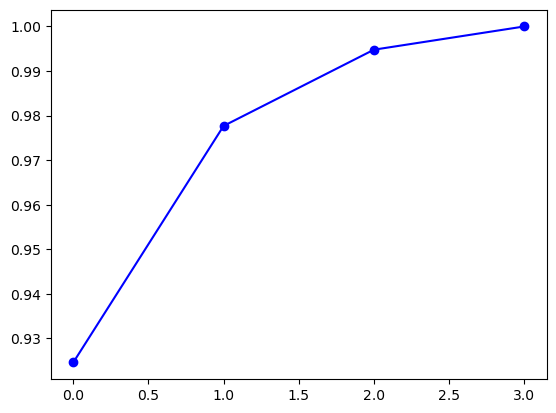

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 绘制散点图
ax.plot([0,1,2,3], cumsum, c='b', marker='o')

#### PCA 压缩
显然，在降维之后，训练集占用的空间要少得多。例如，尝试将 PCA 应用于 MNIST 数据集，同时保留 95% 的方差。你应该发现每个实例只有 150 多个特征，而不是原来的 784 个特征。因此，尽管大部分方差都保留下来，但数据集现在还不到其原始大小的 20%！这是一个合理的压缩比率，您可以看到这可以如何极大地加快分类算法（如 SVM 分类器）的速度。<br>
通过应用 PCA 投影的逆变换，也可以将缩小的数据集解压缩回 784 维。当然这并不会返回给你最原始的数据，因为投影丢失了一些信息（在 5% 的方差内），但它可能非常接近原始数据。原始数据和重构数据之间的均方距离（压缩然后解压缩）被称为重构误差（reconstruction error）。<br>
PCA 逆变换，回退到原来的数据维度<br>
<img src='https://hands1ml.apachecn.org/docs/img/tex-9c33b504c86e9c53fd2dab1952e0db41.gif'><br>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X_mnist, y = mnist["data"], mnist["target"]
X_mnist.shape

(70000, 784)

In [12]:
# 下面的代码将 MNIST 数据集压缩到 154 维，然后使用inverse_transform()方法将其解压缩回 784 维。
pca=PCA(n_components=154)
X_mnist_reduced=pca.fit_transform(X_mnist)
X_mnist_recovered=pca.inverse_transform(X_mnist_reduced)

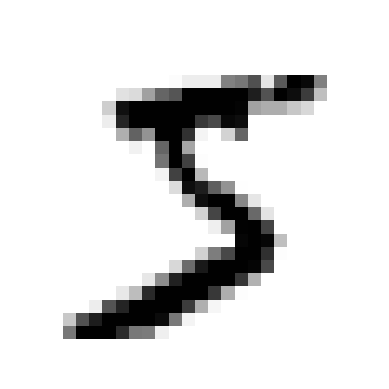

In [14]:
# 可视化
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X_mnist[0:1]
some_digit = np.array(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

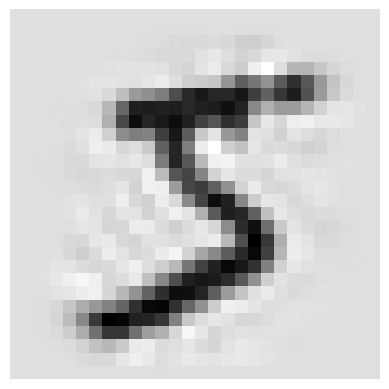

In [15]:
some_digit = X_mnist_recovered[0:1]
some_digit = np.array(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

#### 3-1-增量 PCA（Incremental PCA）
先前 PCA 实现的一个问题是它需要在内存中处理整个训练集以便 SVD 算法运行。幸运的是，我们已经开发了增量 PCA（IPCA）算法：您可以将训练集分批，并一次只对一个批量使用 IPCA 算法。这对大型训练集非常有用，并且可以在线应用 PCA（即在新实例到达时即时运行）。

In [ ]:
from sklearn.decomposition import IncrementalPCA

# 下面的代码将 MNIST 数据集分成 100 个小批量（使用 NumPy 的array_split()函数）
n_batches=100
# 并将它们提供给 Scikit-Learn 的IncrementalPCA类，以将 MNIST 数据集的维度降低到 154 维
inc_pca=IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist,n_batches):
    # 请注意，您必须对每个最小批次调用partial_fit()方法，而不是对整个训练集使用fit()方法
    inc_pca.partial_fit(X_batch)
X_mnist_reduced=inc_pca.transform(X_mnist)
X_mnist_reduced[0,:]

In [ ]:
# 或者，您可以使用 NumPy 的memmap类，它允许您操作存储在磁盘上二进制文件中的大型数组，就好像它完全在内存中；该类仅在需要时加载内存中所需的数据。
# 由于增量 PCA 类在任何时间内仅使用数组的一小部分，因此内存使用量仍受到控制。这可以调用通常的fit()方法
'''X_mm=np.memmap(filename,dtype='float32',mode='readonly',shape=(m,n))
batch_size=m/n_batches
inc_pca=IncrementalPCA(n_components=154,batch_size=batch_size)
inc_pca.fit(X_mm)'''

#### 3-2-随机 PCA（Randomized PCA）
Scikit-Learn 提供了另一种执行 PCA 的选择，称为随机 PCA。这是一种随机算法，可以快速找到前d个主成分的近似值。它的计算复杂度是O(m × d^2) + O(d^3)，而不是O(m × n^2) + O(n^3)，所以当d远小于n时，它比之前的算法快得多。

In [ ]:
rnd_pca=PCA(n_components=154,svd_solver='randomized')
X_reduced_rnd=rnd_pca.fit_transform(X_mnist)
X_reduced_rnd[0,:]

### 4-核 PCA（Kernel PCA）
——近似于非线性投影
在第 5 章中，我们讨论了核技巧，一种将实例隐式映射到非常高维空间（称为特征空间）的数学技术，让支持向量机可以应用于非线性分类和回归。回想一下，高维特征空间中的线性决策边界对应于原始空间中的复杂非线性决策边界。<br>
事实证明，同样的技巧可以应用于 PCA，从而可以执行复杂的非线性投影来降低维度。这就是所谓的核 PCA（kPCA）。它通常能够很好地保留投影后的簇，有时甚至可以展开分布近似于扭曲流形的数据集。

In [2]:
# 下面的代码使用 Scikit-Learn 的KernelPCA类来执行带有 RBF 核的 kPCA
from sklearn.decomposition import KernelPCA

rbf_pca=KernelPCA(n_components=2,kernel='rbf',gamma=0.04)
X_reduced=rbf_pca.fit_transform(X)
X_reduced[0:1,]

array([[0.61669415, 0.09067108]])

#### 选择一种核并调整超参数
由于 kPCA 是无监督学习算法，因此没有明显的性能指标可以帮助您选择最佳的核方法和超参数值。<br>
但是，降维通常是监督学习任务（例如分类）的准备步骤，因此您可以简单地使用网格搜索来选择可以让该任务达到最佳表现的核方法和超参数。

In [2]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

# 下面的代码创建了一个两步的流水线，首先使用 kPCA 将维度降至两维，然后应用 Logistic 回归进行分类。
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
])
# 然后它使用Grid SearchCV为 kPCA 找到最佳的核和gamma值，以便在最后获得最佳的分类准确性
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [5]:
# 你可以通过调用best_params_变量来查看使模型效果最好的核和超参数：
print(grid_search.best_params_)

{'kpca__gamma': 0.04111111111111111, 'kpca__kernel': 'rbf'}


0.8933333333333334

In [ ]:
# 你可以通过调用best_params_变量来查看使模型效果最好的核和超参数：
print(grid_search.best_params_)

{'kpca__gamma': 0.04111111111111111, 'kpca__kernel': 'rbf'}


0.8933333333333334

另一种完全为非监督的方法，是选择产生最低重建误差的核和超参数。但是，重建并不像线性 PCA 那样容易。<br>
核 PCA原理：图 8-11 显示了原始瑞士卷 3D 数据集（左上角），并且使用 RBF 核应用 kPCA 后生成的二维数据集（右上角）。由于核技巧，这在数学上等同于使用特征映射φ将训练集映射到无限维特征空间（右下），然后使用线性 PCA 将变换的训练集投影到 2D。<br>
<img src='https://hands1ml.apachecn.org/docs/img/8-11.jpeg'><br>
请注意，如果我们可以在缩减空间中对给定实例实现反向线性 PCA 步骤，则重构点将位于特征空间中，而不是位于原始空间中（例如，如图中由x表示的那样）。由于特征空间是无限维的，我们不能找出重建点，因此我们无法计算真实的重建误差。幸运的是，可以在特征空间的原始图像中找到一个贴近重建点的点。这被称为重建前图像（reconstruction pre-image）。一旦你有这个前图像，你就可以测量其与原始实例的平方距离。然后，您可以选择最小化重建前图像错误的核和超参数。

In [3]:
# 一种重建方案是训练一个监督回归模型，将预计实例作为预测值，并将原始实例作为实际值/训练目标。
# 如果您设置了fit_inverse_transform = True，Scikit-Learn 将自动执行此操作
# 默认条件下，fit_inverse_transform = False并且KernelPCA没有inverse_tranfrom()方法。
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [4]:
# 计算重建前图像误差
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

0.15883006301704067

In [6]:
# 使用交叉验证的方格搜索来寻找可以最小化重建前图像误差的核方法和超参数
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression


class KernelPCA_ft(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rbf_pca = KernelPCA(n_components = 2, fit_inverse_transform=True)
        return rbf_pca.fit_transform(X)

clf = Pipeline([
        ("kpca_ft", KernelPCA_ft()),
        #("kpca_it", KernelPCA(n_components=2,fit_inverse_transform=True).inverse_transform()),
        ("lin_reg", LinearRegression())
])

# 然后它使用Grid SearchCV为 kPCA 找到最佳的核和gamma值，以便在最后获得最佳的分类准确性
param_grid = [{
        "kpca_ft__gamma": np.linspace(0.03, 0.05, 10),
        "kpca_ft__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,X)

ValueError: Invalid parameter 'gamma' for estimator KernelPCA_ft(). Valid parameters are: [].

### 5-LLE
局部线性嵌入（Locally Linear Embedding）是另一种非常有效的非线性降维（NLDR）方法。这是一种流形学习技术，不依赖于像以前算法那样的投影。<br>
简而言之，LLE 首先测量每个训练实例与其最近邻（c.n.）之间的线性关系，然后寻找能最好地保留这些局部关系的训练集的低维表示（稍后会详细介绍） 。这使得它特别擅长展开扭曲的流形，尤其是在没有太多噪音的情况下。

In [22]:
# 以下代码使用 Scikit-Learn 的LocallyLinearEmbedding类来展开瑞士卷。得到的二维数据集如图 8-12 所示。
from sklearn.datasets import make_swiss_roll
X_sr,t = make_swiss_roll(n_samples=500,  noise=0.0, random_state=None) 

from sklearn.manifold import LocallyLinearEmbedding

lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_reduced=lle.fit_transform(X_sr)

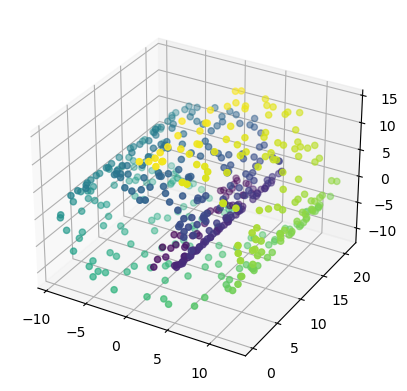

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# 创建画布和3D坐标轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_sr = X_sr[:,0]
y_sr = X_sr[:,1]
z_sr = X_sr[:,2]

# 绘制散点图
ax.scatter(x_sr, y_sr, z_sr, c=t, marker='o')

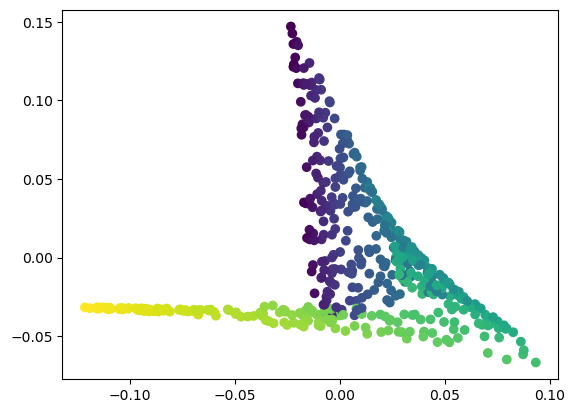

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# 创建画布和3D坐标轴
fig = plt.figure()
ax = fig.add_subplot(111)

x_sr = X_reduced[:,0]
y_sr = X_reduced[:,1]

# 绘制散点图
ax.scatter(x_sr, y_sr, c=t, marker='o')

正如您所看到的，瑞士卷被完全展开，实例之间的距离保存得很好。但是，距离不能在较大范围内保留的很好。尽管如此，LLE 在对流形建模方面做得非常好。

#### 这是 LLE 的工作原理：
https://www.cnblogs.com/pinard/p/6266408.html<br>
首先，对于每个训练实例x^(i)，该算法识别其最近的k个邻居（在前面的代码中k = 10中），然后尝试将x^(i)重构为这些邻居的线性函数。更具体地，找到权重w[i, j]从而使x^(i)和Σ w[i, j] x^(j), j = 1 -> m之间的平方距离尽可能的小，假设如果x^(j)不是x^(i)的k个最近邻时w[i, j] = 0。损失函数构造为：<br>
<img src='https://img-blog.csdnimg.cn/20201106163545174.png#pic_center'><br>
一般我们也会对权重系数wij做归一化的限制，即权重系数的加和为1：<br>
<img src='https://img-blog.csdnimg.cn/20201106163801452.png#pic_center'><br>
在这步之后，权重矩阵W_hat对训练实例的线形关系进行编码。现在第二步是将训练实例投影到一个d维空间（d < n）中去，同时尽可能的保留这些局部关系。如果y^(i)是x^(i)在这个d维空间的图像，那么我们想要y^(i)和Σ w_hat[i, j] z^(j), j = 1 -> m之间的平方距离尽可能的小。它看起来与第一步非常相似，但我们要做的不是保持实例固定并找到最佳权重，而是恰相反：保持权重不变，并在低维空间中找到实例图像的最佳位置。损失函数构造为：<br>
<img src='https://img-blog.csdnimg.cn/20201107155414850.png#pic_center'><br>
为了得到标准化的低维数据，一般我们也会加入约束条件如下：<br>
<img src='https://img-blog.csdnimg.cn/20201107144940337.png#pic_center'><br>
Scikit-Learn 的 LLE 实现具有如下的计算复杂度：查找k个最近邻为O(m log(m) n log(k))，优化权重为O(m n k^3)，建立低维表示为O(d m^2)。不幸的是，最后一项m^2使得这个算法在处理大数据集的时候表现较差。

### 6-其他降维方法
还有很多其他的降维方法，Scikit-Learn 支持其中的好几种。这里是其中最流行的：<br>
-多维缩放（MDS）在尝试保持实例之间距离的同时降低了维度<br>
-Isomap 通过将每个实例连接到最近的邻居来创建图形，然后在尝试保持实例之间的测地距离时降低维度。<br>
-t-分布随机邻域嵌入（t-Distributed Stochastic Neighbor Embedding，t-SNE）可以用于降低维​​度，同时试图保持相似的实例临近并将不相似的实例分开。它主要用于可视化，尤其是用于可视化高维空间中的实例（例如，可以将 MNIST 图像降维到 2D 可视化）。<br>
-线性判别分析（Linear Discriminant Analysis，LDA）实际上是一种分类算法，但在训练过程中，它会学习类之间最有区别的轴，然后使用这些轴来定义用于投影数据的超平面。LDA 的好处是投影会尽可能地保持各个类之间距离，所以在运行另一种分类算法（如 SVM 分类器）之前，LDA 是很好的降维技术。<br>
<img src='https://hands1ml.apachecn.org/docs/img/8-13.jpeg'><br>

### 练习
PCA 可以用于降低一个高度非线性对数据集吗？
将两个不同的降维算法串联使用有意义吗？

#### t-SNE
使用 t-SNE 将 MNIST 数据集缩减到二维，并使用 Matplotlib 绘制结果图。您可以使用 10 种不同颜色的散点图来表示每个图像的目标类别。或者，您可以在每个实例的位置写入彩色数字，甚至可以绘制数字图像本身的降维版本（如果绘制所有数字，则可视化可能会过于混乱，因此您应该绘制随机样本或只在周围没有其他实例被绘制的情况下绘制）。你将会得到一个分隔良好的的可视化数字集群。尝试使用其他降维算法，如 PCA，LLE 或 MDS，并比较可视化结果。

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X_mnist, y = mnist["data"], mnist["target"]

In [2]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)
X_reduced=tsne.fit_transform(X_mnist)

e:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


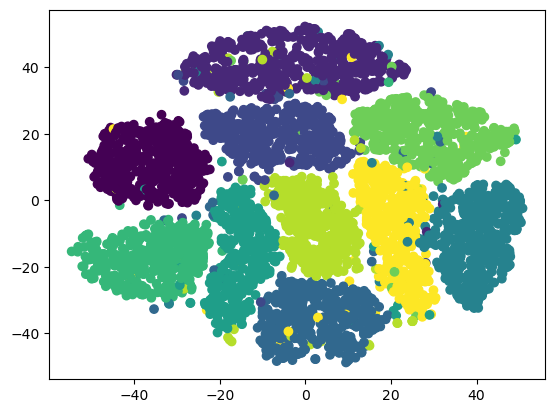

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 创建画布和3D坐标轴
fig = plt.figure()
ax = fig.add_subplot(111)

n = 5000
x_sr = X_reduced[:n,0]
y_sr = X_reduced[:n,1]

y_d = pd.DataFrame(y)
y_d = y_d.astype(int)
y_a = np.array(y_d)
y_a

# 绘制散点图
ax.scatter(x_sr, y_sr, c=y_a[:n], marker='o')